# Data loading

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [84]:
#Run this cell when your working directory is /notebooks or change the directory BASE_PATH according to your working path


#Defining DATA_PATH
'''os.chdir("..")
DATA_PATH = os.path.join(os.getcwd(), "dataset")
os.chdir(DATA_PATH)'''

#Defining BASE_PATH
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), "..", "dataset"))

train_file_path = os.path.join(BASE_PATH, "PAKDD2010_Modeling_Data.csv")
val_file_path = os.path.join(BASE_PATH, "PAKDD2010_Prediction_Data.csv")

print(train_file_path)
print(val_file_path)


/Users/carlos/Desktop/CURSOS/Anyone AI/Credit-Risk-App/dataset/PAKDD2010_Modeling_Data.csv
/Users/carlos/Desktop/CURSOS/Anyone AI/Credit-Risk-App/dataset/PAKDD2010_Prediction_Data.csv


In [85]:
#Loading training data from csv
try:
    df = pd.read_csv(train_file_path)
    print("Training file loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {train_file_path} was not found.")

try:
    test_df = pd.read_csv(val_file_path)
    print("Test file loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {train_file_path} was not found.")

Training file loaded successfully!
Test file loaded successfully!


/var/folders/7z/nrkzldz97fb_jcsd_x5s03qh0000gn/T/ipykernel_1500/1006555546.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(train_file_path)


# Data exploration

In [86]:
#Check for columns having a single constant value per feature
unique_colum_values = [col for col in df.columns if df[col].nunique() == 1]
print(unique_colum_values)

['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD']


In [87]:
#Replace empty values with nan to determine best strategy for imputation
#Train df
df.replace(' ', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

#Test df
test_df.replace(' ', np.nan, inplace=True)
test_df.replace('', np.nan, inplace=True)


In [88]:
#Check the sum of na values in all features to determine if is best to keep them
df_na_counts = df.isna().sum()
print(df_na_counts)

ID_CLIENT                             0
CLERK_TYPE                            0
PAYMENT_DAY                           0
APPLICATION_SUBMISSION_TYPE           0
QUANT_ADDITIONAL_CARDS                0
POSTAL_ADDRESS_TYPE                   0
SEX                                  17
MARITAL_STATUS                        0
QUANT_DEPENDANTS                      0
EDUCATION_LEVEL                       0
STATE_OF_BIRTH                     2064
CITY_OF_BIRTH                      2064
NACIONALITY                           0
RESIDENCIAL_STATE                     0
RESIDENCIAL_CITY                      0
RESIDENCIAL_BOROUGH                  10
FLAG_RESIDENCIAL_PHONE                0
RESIDENCIAL_PHONE_AREA_CODE        8212
RESIDENCE_TYPE                     1349
MONTHS_IN_RESIDENCE                3777
FLAG_MOBILE_PHONE                     0
FLAG_EMAIL                            0
PERSONAL_MONTHLY_INCOME               0
OTHER_INCOMES                         0
FLAG_VISA                             0


In [89]:
#Deleting single value features, id client and the 6 features having more than half of nan values

#Single value features train df
df = df.drop(columns=['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD'])

df = df.drop(columns=['ID_CLIENT'])

df = df.drop(columns=['PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_PHONE_AREA_CODE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL_MATE'])


#test_df
test_df = test_df.drop(columns=['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD'])

test_df = test_df.drop(columns=['ID_CLIENT'])

test_df = test_df.drop(columns=['PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_PHONE_AREA_CODE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL_MATE'])


In [90]:
#Dividing features per categorical and numerical(discrete and continious) to apply different feature engineering methods

numeric_features = df.select_dtypes(include=['number'])

numerical_discrete_features = [col for col in numeric_features.columns if df[col].dtype == 'int64' or df[col].nunique() < 20 or col == 'MONTHS_IN_RESIDENCE']
numerical_continuous_features = [col for col in numeric_features.columns if df[col].dtype == 'float64' and col not in numerical_discrete_features]

# Select only categorical columns (object or category types)
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()


df_discrete = df[numerical_discrete_features]
df_continuous = df[numerical_continuous_features]
df_categorical = df[categorical_features]

#Deleting target column name 
numerical_discrete_features.remove('TARGET_LABEL_BAD')

print("Numeric Features: ", numeric_features.columns.to_list())
print("Discrete Features:", numerical_discrete_features)
print("Continuous Features:", numerical_continuous_features)
print("Categorical Features:", categorical_features)

Numeric Features:  ['PAYMENT_DAY', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'NACIONALITY', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'PRODUCT', 'AGE', 'TARGET_LABEL_BAD']
Discrete Features: ['PAYMENT_DAY', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'NACIONALITY', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'PRODUCT', 'AGE']
Continuous Features: ['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'PERSONAL_ASSETS_VALUE']
Ca

In [91]:
#Making sure features sum up to features to keep

print(len(categorical_features))
print(len(numerical_discrete_features))
print(len(numerical_continuous_features))

set1 = set(categorical_features)
set2 = set(numerical_discrete_features)
set3 = set(numerical_continuous_features)

common_values = set1.intersection(set2, set3)

print("Common values:", common_values)

13
21
3
Common values: set()


In [92]:
#Creating a function to visualize the unique values in each variable
def print_type_of_values(df):
    for col in df.columns:
        print(f'{col}: {df[col].unique()}')

In [93]:
#Replace empty values on application submission type and sex for nan in order to do an inputation 
#APPLICATION_SUBMISSION_TYPE: ['Web' 'Carga' '0']
#SEX: ['F' 'M' 'N' nan]
df['APPLICATION_SUBMISSION_TYPE'] = df['APPLICATION_SUBMISSION_TYPE'].replace({'0': np.nan})
df['SEX'] = df['SEX'].replace({'N': np.nan})

test_df['APPLICATION_SUBMISSION_TYPE'] = test_df['APPLICATION_SUBMISSION_TYPE'].replace({'0': np.nan})
test_df['SEX'] = test_df['SEX'].replace({'N': np.nan})


In [94]:
#Checking the ammount of Nas in specific features for inputing
print(df['APPLICATION_SUBMISSION_TYPE'].value_counts(dropna=False))
print(df['SEX'].value_counts(dropna=False))

APPLICATION_SUBMISSION_TYPE
Web      28206
NaN      19461
Carga     2333
Name: count, dtype: int64
SEX
F      30805
M      19130
NaN       65
Name: count, dtype: int64


In [95]:
#Check unique values per feature

print_type_of_values(df_continuous)

PERSONAL_MONTHLY_INCOME: [ 900.    750.    500.   ...  234.25 1443.27  719.38]
OTHER_INCOMES: [0.00000e+00 1.34000e+02 6.11000e+02 1.45000e+03 3.20000e+02 1.00000e+03
 7.06000e+02 2.50000e+02 3.50000e+02 1.40000e+03 8.00000e+02 7.00000e+02
 9.50000e+01 2.40000e+03 7.47310e+02 2.00000e+03 3.61000e+02 8.30000e+02
 1.80000e+02 4.00000e+02 7.20000e+02 1.50000e+03 2.75000e+02 1.00000e+02
 6.50000e+01 1.20000e+03 6.81000e+02 8.00000e+01 5.00000e+02 2.40000e+02
 5.80000e+02 3.00000e+02 2.81000e+02 2.00000e+02 1.05458e+03 6.00000e+02
 4.25000e+02 5.16000e+02 9.35000e+02 4.66000e+03 3.60000e+02 5.00000e+01
 5.55380e+02 3.96000e+02 1.50000e+01 1.00300e+03 2.63520e+02 5.61000e+02
 4.09000e+02 4.75000e+02 3.50950e+02 9.00000e+02 4.69000e+02 1.20000e+02
 1.50000e+02 4.50000e+02 7.50000e+02 1.63100e+03 1.19000e+03 3.00000e+03
 6.60000e+02 5.20000e+01 7.23290e+02 4.70000e+02 3.90000e+02 3.76000e+02
 6.00000e+03 4.64000e+02 8.50000e+01 4.50000e+01 8.50000e+02 5.50000e+02
 3.80000e+02 5.00000e+03 4.880

In [96]:
print(df_discrete.nunique())

PAYMENT_DAY                        6
POSTAL_ADDRESS_TYPE                2
MARITAL_STATUS                     8
QUANT_DEPENDANTS                  17
NACIONALITY                        3
RESIDENCE_TYPE                     6
MONTHS_IN_RESIDENCE               88
FLAG_EMAIL                         2
FLAG_VISA                          2
FLAG_MASTERCARD                    2
FLAG_DINERS                        2
FLAG_AMERICAN_EXPRESS              2
FLAG_OTHER_CARDS                   2
QUANT_BANKING_ACCOUNTS             3
QUANT_SPECIAL_BANKING_ACCOUNTS     3
QUANT_CARS                         2
MONTHS_IN_THE_JOB                 21
PROFESSION_CODE                   19
OCCUPATION_TYPE                    6
PRODUCT                            3
AGE                               89
TARGET_LABEL_BAD                   2
dtype: int64


In [97]:
#Check unique values from discrete features to decide on the imputation strategy
print_type_of_values(df_discrete)

PAYMENT_DAY: [ 5 15 20 10 25  1]
POSTAL_ADDRESS_TYPE: [1 2]
MARITAL_STATUS: [6 2 1 5 3 7 4 0]
QUANT_DEPENDANTS: [ 1  0  2  3  4  5  6  7 10  8 13 11  9 12 14 15 53]
NACIONALITY: [1 0 2]
RESIDENCE_TYPE: [ 1. nan  2.  5.  0.  3.  4.]
MONTHS_IN_RESIDENCE: [ 15.   1.  nan  12.   4.   0.   5.  10.   6.   2.   3.  18.  25.  14.
  16.   8.   7.  20.   9.  17.  30.  11.  37.  22.  33.  26.  40.  32.
  29.  23.  13.  36.  45.  60.  34.  21.  31.  35.  38.  39.  24.  19.
  48.  28.  52.  49.  46.  27.  42.  62.  51.  82.  44.  68.  71.  50.
  47.  41.  57.  69.  55. 200.  53. 100.  72.  43.  70.  54.  56.  80.
  65.  90.  58.  96.  64.  76.  84.  73.  59. 228.  63. 101.  99.  66.
  67.  78.  61.  81.  89.]
FLAG_EMAIL: [1 0]
FLAG_VISA: [1 0]
FLAG_MASTERCARD: [1 0]
FLAG_DINERS: [0 1]
FLAG_AMERICAN_EXPRESS: [0 1]
FLAG_OTHER_CARDS: [0 1]
QUANT_BANKING_ACCOUNTS: [0 1 2]
QUANT_SPECIAL_BANKING_ACCOUNTS: [0 1 2]
QUANT_CARS: [0 1]
MONTHS_IN_THE_JOB: [ 0  9  2  4  1  5 15 27 19  3 14 10 30  8  7 32 18 26 

In [98]:
print(df_discrete['AGE'].nunique())

89


In [99]:
print(df_categorical['RESIDENCIAL_STATE'])

0        RN
1        RJ
2        RN
3        PE
4        RJ
         ..
49995    RN
49996    SP
49997    SP
49998    MG
49999    SP
Name: RESIDENCIAL_STATE, Length: 50000, dtype: object


In [100]:
print(df_categorical.nunique())

APPLICATION_SUBMISSION_TYPE        3
SEX                                3
STATE_OF_BIRTH                    28
CITY_OF_BIRTH                   9909
RESIDENCIAL_STATE                 27
RESIDENCIAL_CITY                3529
RESIDENCIAL_BOROUGH            14510
FLAG_RESIDENCIAL_PHONE             2
RESIDENCIAL_PHONE_AREA_CODE      101
COMPANY                            2
FLAG_PROFESSIONAL_PHONE            2
RESIDENCIAL_ZIP_3               1481
PROFESSIONAL_ZIP_3              1481
dtype: int64


In [101]:
#Check unique values from categorical features to decide on the imputation strategy
print_type_of_values(df_categorical)

APPLICATION_SUBMISSION_TYPE: ['Web' 'Carga' '0']
SEX: ['F' 'M' 'N' nan]
STATE_OF_BIRTH: ['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'PA' 'PB' 'MA' nan 'GO' 'AC' 'MT'
 'AL' 'AP' 'TO' 'SC' 'PR' 'MS' 'DF' 'PI' 'RO' 'ES' 'AM' 'SE' 'RR' 'XX']
CITY_OF_BIRTH: ['Assu' 'rio de janeiro' 'GARANHUNS' ... 'ITRATIM' 'lobo leite'
 'PIQUET CARNEIRO CE']
RESIDENCIAL_STATE: ['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'AP' 'MS' 'DF' 'PB' 'MA' 'PA'
 'GO' 'PR' 'MT' 'AL' 'ES' 'SC' 'AM' 'RO' 'PI' 'RR' 'TO' 'SE' 'AC']
RESIDENCIAL_CITY: ['Santana do Matos' 'RIO DE JANEIRO' 'Parnamirim' ... 'Atalaia'
 'DIAS D AVILA' 'conselheiro lafaiete']
RESIDENCIAL_BOROUGH: ['Centro' 'CAMPO GRANDE' 'Boa Esperanca' ... 'JD SAVEIRO' 'JD CASTILHO'
 'jardim vida nova']
FLAG_RESIDENCIAL_PHONE: ['Y' 'N']
RESIDENCIAL_PHONE_AREA_CODE: ['105' '20' nan '33' '81' '12' '54' '107' '32' '39' '5' '24' '123' '75'
 '66' '103' '112' '125' '58' '69' '40' '97' '71' '86' '119' '100' '27'
 '120' '16' '67' '50' '46' '14' '41' '117' '84' '18' '10' '111' 

# Data split to avoid data leakage

In [102]:
from sklearn.model_selection import train_test_split

# Split the set to get features and target variable
X = df.drop(columns=['TARGET_LABEL_BAD'])  # Features
y = df['TARGET_LABEL_BAD']  # Target variable

# Split the data into training (80%) and validation (20%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Validation Features Shape: {X_valid.shape}")


Training Features Shape: (40000, 37)
Validation Features Shape: (10000, 37)


In [103]:
#Imputation for continupus features
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train[numerical_continuous_features])

X_train[numerical_continuous_features] = imputer.transform(X_train[numerical_continuous_features])
X_valid[numerical_continuous_features] = imputer.transform(X_valid[numerical_continuous_features])
test_df[numerical_continuous_features] = imputer.transform(test_df[numerical_continuous_features])




In [104]:
#Imputation for discrete features


discrete_imputer = SimpleImputer(strategy='most_frequent')

discrete_imputer.fit(X_train[numerical_discrete_features])

X_train[numerical_discrete_features] = discrete_imputer.transform(X_train[numerical_discrete_features])
X_valid[numerical_discrete_features] = discrete_imputer.transform(X_valid[numerical_discrete_features])
test_df[numerical_discrete_features] = discrete_imputer.transform(test_df[numerical_discrete_features])

In [105]:
#Imputation for categorical features
discrete_imputer_cat = SimpleImputer(strategy='most_frequent')

discrete_imputer_cat.fit(X_train[categorical_features])

X_train[categorical_features] = discrete_imputer_cat.transform(X_train[categorical_features])
X_valid[categorical_features] = discrete_imputer_cat.transform(X_valid[categorical_features])
test_df[categorical_features] = discrete_imputer_cat.transform(test_df[categorical_features])


# EDA (after data imputation)

TARGET_LABEL_BAD
0    36959
1    13041
Name: TARGET_LABEL_BAD, dtype: int64
0s:  73.91799999999999
1s:  26.082


<Axes: xlabel='TARGET_LABEL_BAD', ylabel='count'>

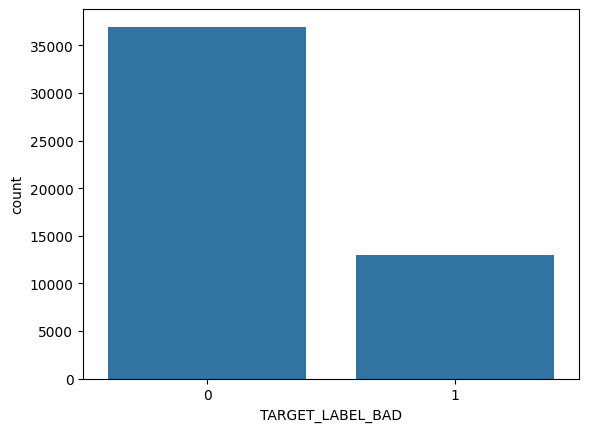

In [106]:
#Show distribution of the target variable
count = df.groupby('TARGET_LABEL_BAD')['TARGET_LABEL_BAD'].count()
print(count)
print('0s: ', count[0] / len(df['TARGET_LABEL_BAD']) * 100)
print('1s: ', count[1] / len(df['TARGET_LABEL_BAD']) * 100)

sns.countplot(x = 'TARGET_LABEL_BAD', data = df)

/var/folders/7z/nrkzldz97fb_jcsd_x5s03qh0000gn/T/ipykernel_1500/3449282593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX', data=df, palette="Set2")


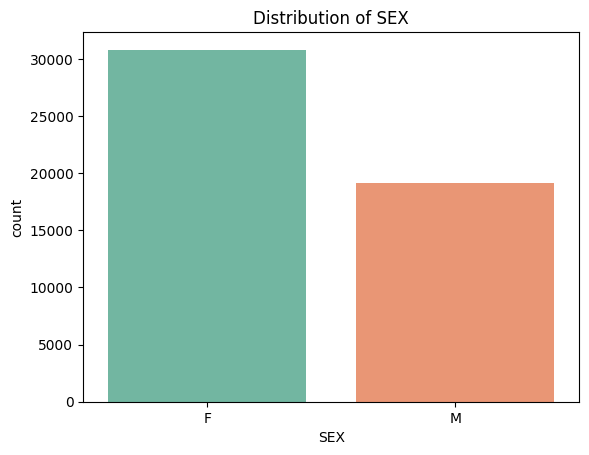

In [107]:
#Show distribution of SEX variable
sns.countplot(x='SEX', data=df, palette="Set2")
plt.title("Distribution of SEX")
plt.show()

/var/folders/7z/nrkzldz97fb_jcsd_x5s03qh0000gn/T/ipykernel_1500/1457168608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MARITAL_STATUS', data=df, palette="pastel")


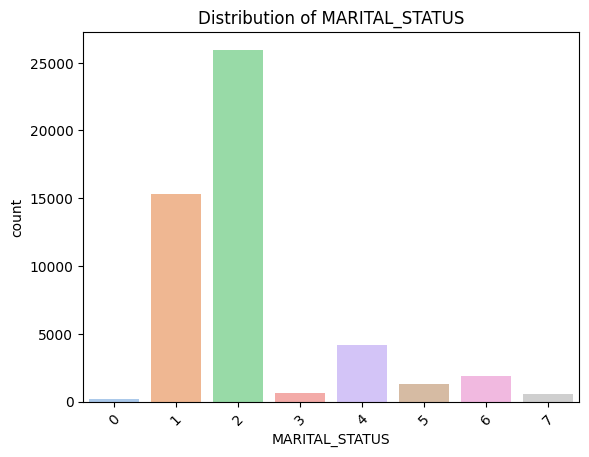

In [108]:
#Show distribution of MARITAL_STATUS variable
sns.countplot(x='MARITAL_STATUS', data=df, palette="pastel")
plt.title("Distribution of MARITAL_STATUS")
plt.xticks(rotation=45)
plt.show()

/var/folders/7z/nrkzldz97fb_jcsd_x5s03qh0000gn/T/ipykernel_1500/3283090496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='APPLICATION_SUBMISSION_TYPE', data=df, palette="coolwarm")


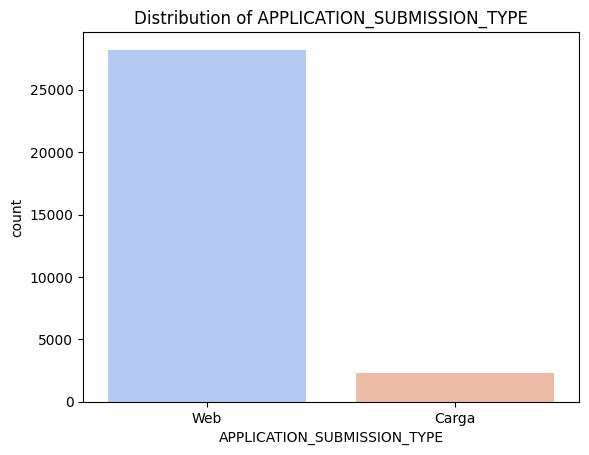

In [109]:
#Show distribution of APPLICATION_SUBMISSION_TYPE variable
sns.countplot(x='APPLICATION_SUBMISSION_TYPE', data=df, palette="coolwarm")
plt.title("Distribution of APPLICATION_SUBMISSION_TYPE")
plt.show()

/var/folders/7z/nrkzldz97fb_jcsd_x5s03qh0000gn/T/ipykernel_1500/3174180949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RESIDENCE_TYPE', data=df, palette="Blues")


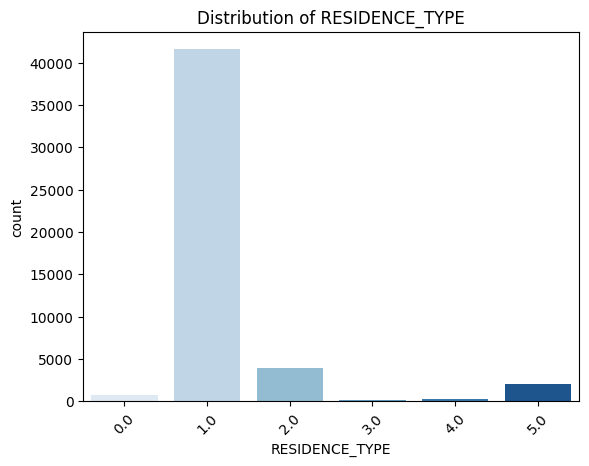

In [110]:
#Show distribution of RESIDENCE_TYPE variable
sns.countplot(x='RESIDENCE_TYPE', data=df, palette="Blues")
plt.title("Distribution of RESIDENCE_TYPE")
plt.xticks(rotation=45)
plt.show()

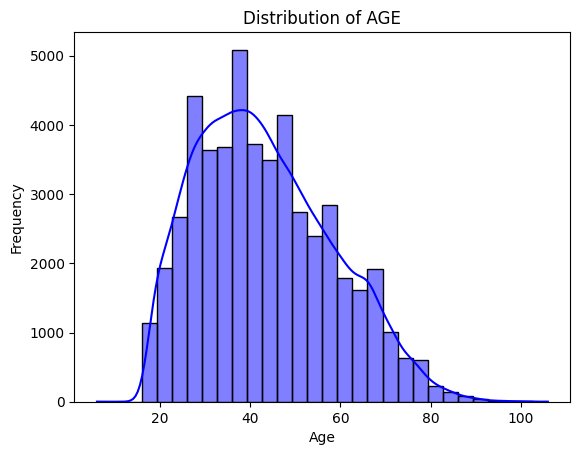

In [111]:
#Show distribution of AGE variable
sns.histplot(df["AGE"], bins=30, kde=True, color="blue")
plt.title("Distribution of AGE")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/var/folders/7z/nrkzldz97fb_jcsd_x5s03qh0000gn/T/ipykernel_1500/2374796181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="SEX", y="AGE", data=df, palette="muted")


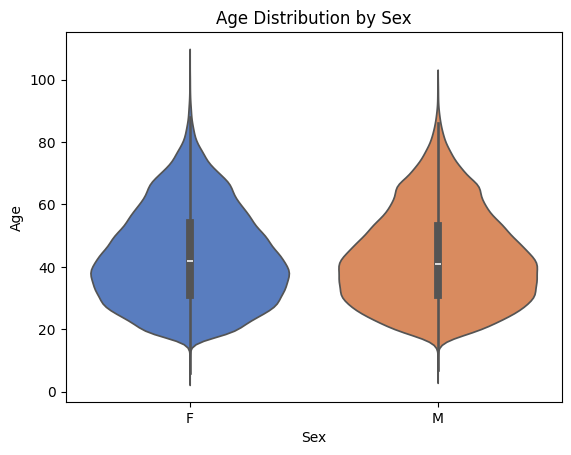

In [112]:
#Show Age Distribution by Sex
sns.violinplot(x="SEX", y="AGE", data=df, palette="muted")
plt.title("Age Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

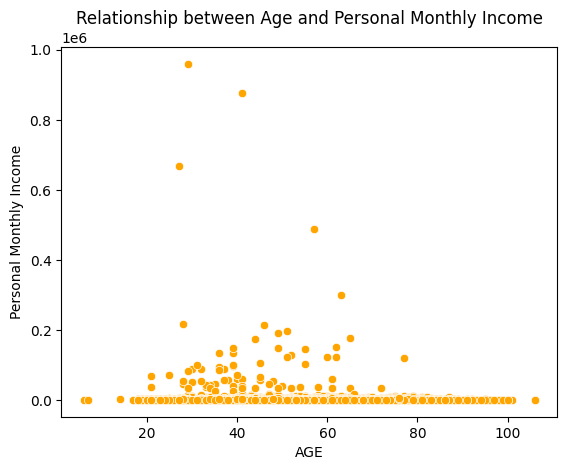

In [113]:
#Show Relationship between Age and Personal Monthly Income
sns.scatterplot(x="AGE", y="PERSONAL_MONTHLY_INCOME", data=df, color="orange")
plt.title("Relationship between Age and Personal Monthly Income")
plt.xlabel("AGE")
plt.ylabel("Personal Monthly Income")
plt.show()

/var/folders/7z/nrkzldz97fb_jcsd_x5s03qh0000gn/T/ipykernel_1500/339536283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="MARITAL_STATUS", y="PERSONAL_MONTHLY_INCOME", data=df, palette="Set3")


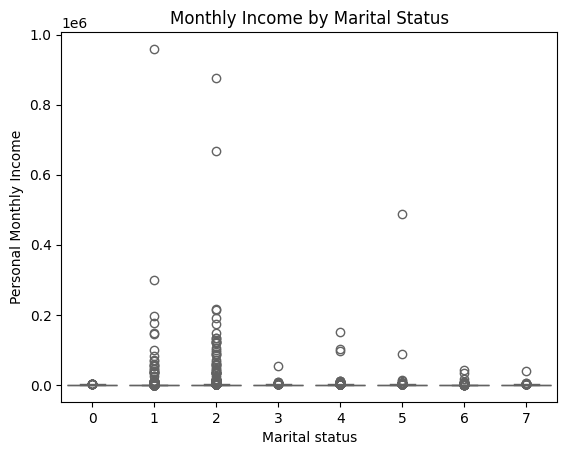

In [114]:
#Show Monthly Income by Marital Status
sns.boxplot(x="MARITAL_STATUS", y="PERSONAL_MONTHLY_INCOME", data=df, palette="Set3")
plt.title("Monthly Income by Marital Status")
plt.xlabel("Marital status")
plt.ylabel("Personal Monthly Income")
plt.show()

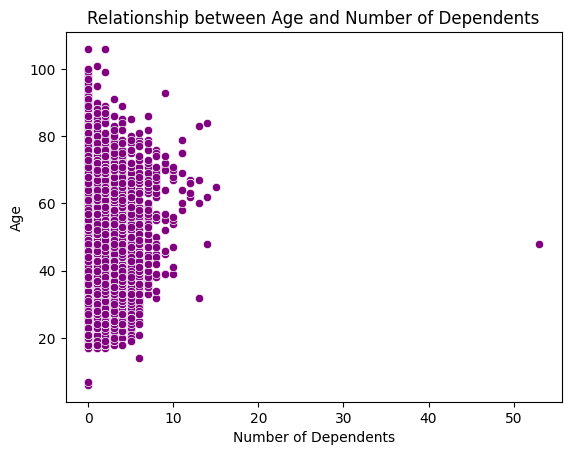

In [115]:
#Show Relationship between Age and Number of Dependents
sns.scatterplot(x="QUANT_DEPENDANTS", y="AGE", data=df, color="purple")
plt.title("Relationship between Age and Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Age")
plt.show()

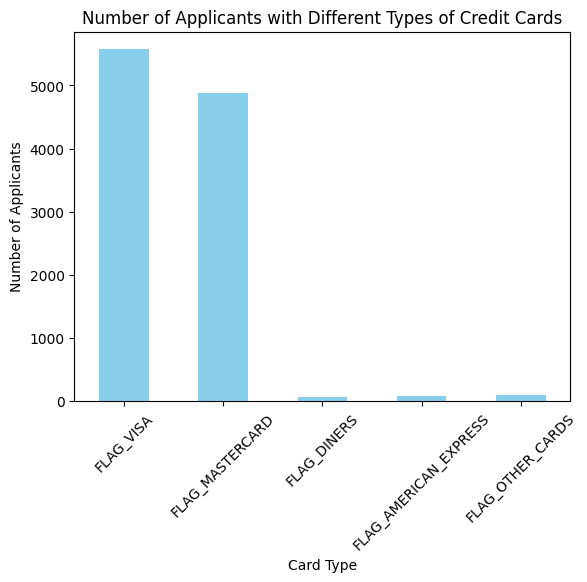

In [116]:
#Show Number of Applicants with Different Types of Credit Cards
flags = ['FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS']
df_flags = df[flags].sum()

df_flags.plot(kind='bar', color='skyblue')
plt.title("Number of Applicants with Different Types of Credit Cards")
plt.xlabel("Card Type")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.show()

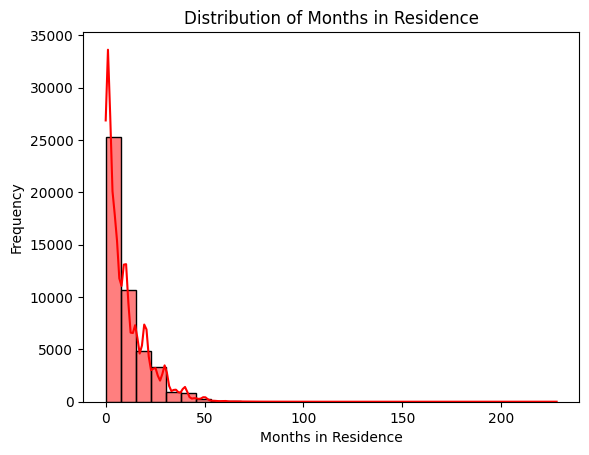

In [117]:
#Show Distribution of Months in Residence
sns.histplot(df["MONTHS_IN_RESIDENCE"], bins=30, kde=True, color="red")
plt.title("Distribution of Months in Residence")
plt.xlabel("Months in Residence")
plt.ylabel("Frequency")
plt.show()

# Standardizing and encoding

In [118]:
#Standardizing continuous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train[numerical_continuous_features])

X_train[numerical_continuous_features] = scaler.transform(X_train[numerical_continuous_features])
X_valid[numerical_continuous_features] = scaler.transform(X_valid[numerical_continuous_features])
test_df[numerical_continuous_features] = scaler.transform(test_df[numerical_continuous_features])

In [119]:
#Defining the list of features to apply a different type of encoding
two_feature_list = ['APPLICATION_SUBMISSION_TYPE', 'SEX', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE']
ohe_features = ['STATE_OF_BIRTH', 'RESIDENCIAL_STATE', 'PAYMENT_DAY', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'NACIONALITY', 'RESIDENCE_TYPE',
                 'MONTHS_IN_RESIDENCE', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 
                 'PRODUCT', 'AGE']
freq_enc_features = ['CITY_OF_BIRTH', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3']

In [120]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

## Applying Ordinal Encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ordinal_encoder.fit(X_train[two_feature_list])

X_train[two_feature_list] = ordinal_encoder.transform(X_train[two_feature_list])
X_valid[two_feature_list] = ordinal_encoder.transform(X_valid[two_feature_list])
test_df[two_feature_list] = ordinal_encoder.transform(test_df[two_feature_list])


In [121]:
## Apply One-Hot Encoding


ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_encoder.fit(X_train[ohe_features])

train_encoded = ohe_encoder.transform(X_train[ohe_features])
val_encoded = ohe_encoder.transform(X_valid[ohe_features])
test_encoded = ohe_encoder.transform(test_df[ohe_features])


# Get the feature names from the encoder
encoded_feature_names = ohe_encoder.get_feature_names_out(ohe_features)


# Convert the encoded arrays to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe_encoder.get_feature_names_out(ohe_features))
val_encoded_df = pd.DataFrame(val_encoded, columns=ohe_encoder.get_feature_names_out(ohe_features))
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe_encoder.get_feature_names_out(ohe_features))

# Reset index to avoid mismatch
train_encoded_df.index = X_train.index
val_encoded_df.index = X_valid.index
test_encoded_df.index = test_df.index


# Drop original categorical columns and concatenate new one-hot columns
train_df = pd.concat([X_train.drop(columns=ohe_features), train_encoded_df], axis=1)
val_df = pd.concat([X_valid.drop(columns=ohe_features), val_encoded_df], axis=1)
test_df = pd.concat([test_df.drop(columns=ohe_features), test_encoded_df], axis=1)


In [122]:
## Apply Frequency Encoding

# Apply frequency encoding using df_train
freq_maps = {}  # Dictionary to store frequency mappings

for col in freq_enc_features:
    freq_map = train_df[col].value_counts(normalize=True)
    freq_maps[col] = freq_map

    mean_freq = freq_map.mean()  # Compute global mean frequency

    train_df[col] = train_df[col].map(freq_map)
    val_df[col] = val_df[col].map(freq_map).fillna(mean_freq)  # Use mean frequency
    test_df[col] = test_df[col].map(freq_map).fillna(mean_freq)

In [123]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(40000, 326)
(10000, 326)
(20000, 326)


In [ ]:
#Correlation matrix
transformed_df = pd.concat([train_df, y_train], axis=1)


# Correlation matrix
correlation_matrix = transformed_df.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(17, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#Checar correlación con la variable target

# Saving clean data for modeling

In [ ]:
train_df.to_csv('/Users/carlos/Desktop/CURSOS/Anyone AI/Credit-Risk-App/dataset/X_train_data.csv', index=False)
y_train.to_csv('/Users/carlos/Desktop/CURSOS/Anyone AI/Credit-Risk-App/dataset/y_train_data.csv', index=False)

val_df.to_csv('/Users/carlos/Desktop/CURSOS/Anyone AI/Credit-Risk-App/dataset/X_val_data.csv', index=False)
y_valid.to_csv('/Users/carlos/Desktop/CURSOS/Anyone AI/Credit-Risk-App/dataset/y_val_data.csv', index=False)